<a href="https://colab.research.google.com/github/Amaravati/Transfer-Learning/blob/master/Gym_Taxi_v3_solution_Anvesha_Amaravati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Describe the methods and variables in the class DiscreteEnv which is the parent class of the Taxi V3 class.

**Answer**: DiscreteEnv has one method and 3 classes.
Init method takes states, actions, initial distribution and probability of state, actions as arguments. The DiscreteEnv inherits from space object from gym. The space is used to discretize the states and action.
The functions in DiscreteEnv object are: random seed generation (seed), reset and step function. The step function takes action as input and provides the state, reward, done and probability as returns.



2) Describe the methods and variables in the Taxi V3 class.





**The classEnv has 1 method and 2 functions:**
1) init: Init method iterators through every row/columns and destination location, and assigns reward for every possible action.
2) encode: converts the rows, columns, passenger and drop off positions to a integer.
3) decode: converts the observation integer to a list of detination_idx, passenger drop off, row and column

3) Describe the Taxi V3 environment, its actions, states, reward structure and the rationale behind such a reward structure.

**Answer**: The Taxi V3 environment has 6 possible actions: Moving in 4 directions, picking and dropping off the passenger. There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger and 4 destination locations. 
The reward per step except delivering the passenger is -1. The reward for delivering the passenger is 20. Dropping off at wrong location reward is -10.


4) Train an algorithm to achieve a 100-episode average reward with a 5th percentile of 7.2 or higher and a 95th percentile of 8.2 or higher on the last 1000 episodes.



Loading the environment

In [1]:
import gym
import time
from IPython.display import clear_output
import numpy as np
import random
env = gym.make("Taxi-v3")

Loading up zero values into Q table

In [2]:
# Values for Q Table:
action_size = env.action_space.n
print("Action Space{}", action_size)
state_size = env.observation_space.n
print("State Size:{}", state_size)
# Build Q Table:
q_table = np.zeros((state_size, action_size))
q_table

Action Space{} 6
State Size:{} 500


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Fine tuning hyperparameters to aheive the 95th percentile of rewards to be greater than 8.2

In [3]:
# Hyper params:
total_ep = 5000
total_test_ep = 25
max_steps = 100
lr = 0.2
gamma = 0.87
# Exploration Params:
epsilon = 0.95
max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.01

In [4]:
def select_action(state,Q):
  action_sp = env.action_space.n  
  probability = np.ones(action_sp) * epsilon/action_sp
  # if state in Q:
  # probability *= epsilon
  probability[np.argmax(Q[state])] += 1 - epsilon
  print(probability)
  return np.random.choice(action_sp, p=probability)

In [5]:
state = env.reset()
print(state)
select_action(state,q_table)

342
[0.20833333 0.15833333 0.15833333 0.15833333 0.15833333 0.15833333]


2

In [6]:
rewards = np.zeros(total_ep)
for episode in range(total_ep):
  # Reset Environment:
  state = env.reset()
  step = 0
  done = False
  episode_reward = 0
  avg_ep_reward = 0
  for step in range(max_steps):

    exp_exp_tradeoff = random.uniform(0, 1)

    if exp_exp_tradeoff > epsilon:
      action = np.argmax(q_table[state, :])
    else:
      action = env.action_space.sample()
    new_state, reward, done, info = env.step(action)
    episode_reward += reward
    q_table[state, action] = q_table[state, action] + lr * (reward + gamma *np.max(q_table[new_state, :]) - q_table[state, action])
    state = new_state
    if done == True:
      break
  rewards[episode] = episode_reward


  epsilon = min_epsilon + (max_epsilon - min_epsilon) *np.exp(-decay_rate*episode)


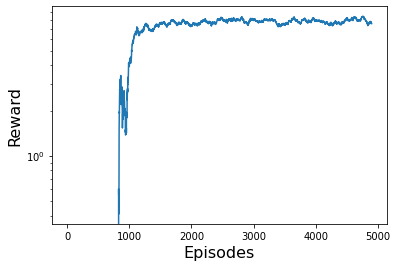

In [7]:
import matplotlib.pyplot as plt
windowed_rewards = np.convolve(rewards, np.ones(100), 'valid')
plt.plot(windowed_rewards/100)
plt.title('')
plt.xlabel("Episodes", fontsize=16)
plt.ylabel('Reward',fontsize=16)
plt.yscale('log')
plt.show()

In [8]:
print("The 5th percentile reward is {}".format(np.percentile(windowed_rewards[-1001:-1]/100,5)))
print("The 95th percentile reward is {}".format(np.percentile(windowed_rewards[-1001:-1]/100,95)))


The 5th percentile reward is 7.479500000000001
The 95th percentile reward is 8.3205


5) The algorithm should be able to perform pick-ups and dropoffs with zero penalties over 1000 episodes.



In [9]:
env.reset()
rewards = []
total_test_ep = 1000
for episode in range(total_test_ep):
  state = env.reset()
  step = 0
  done = False
  total_rewards = 0
  print('=========================')
  print('EPISODE: ', episode)

  for step in range(max_steps):

    env.render()
    
    # Take the action based on the Q Table:
    action = np.argmax(q_table[state, :])

    new_state, reward, done, info = env.step(action)

    #rewards.append(reward)
    total_rewards += reward
    

    # If episode finishes:
    if done:
      rewards.append(total_rewards)
      print('Score: ', total_rewards)
      break

    state = new_state

env.close()
print('Score Over Time: {}'.format(sum(rewards)/total_test_ep))

Streaming output truncated to the last 5000 lines.
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Score:  7
EPISODE:  952
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : 

6) Document your solution including all hyper parameters and how those hyperparameters were selected.
# Hyper params:

max_steps = 100

lr = 0.2 (same as alpha parameter thought in the class)
I swept the learning rate from 0.1 to 0.4. 0.2 to 0.24 of learning rate gave the best performance.
gamma = 0.87
Gamma b/w 0.5 to 0.9 worked best to get average rewards >7.5
# Exploration Params:

epsilon = 0.9

max_epsilon = 1.0

min_epsilon = 0.01

decay_rate = 0.01

I have referred the following github links to solve problem:
https://github.com/casey-barr/open-ai-taxi-problem/blob/master/open_ai_taxi_problem.ipynb

https://github.com/gabrielmayers/ai-notebooks/blob/master/QLearning_Taxi_V3.ipynb



